In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn.datasets import load_iris

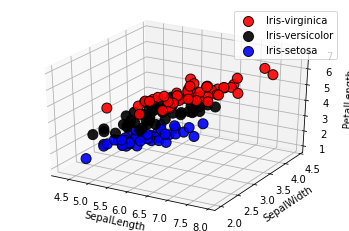

In [2]:
import pandas as pd  #Data analysis   
import matplotlib.pyplot as plt       
from mpl_toolkits.mplot3d import Axes3D

#load dataset csv
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

global grafico #figure
def scatter_plot(x_label,y_label,z_label,clase,c,m,label):
    x = data[ data['Name'] == clase ][x_label] 
    y = data[ data['Name'] == clase ][y_label]
    z = data[ data['Name'] == clase ][z_label]
    grafico.scatter(x,y,z,color=c, edgecolors='k',s=100, alpha=0.9, marker=m,label=label)
    grafico.set_xlabel(x_label)
    grafico.set_ylabel(y_label)
    grafico.set_zlabel(z_label)
    return 

grafico = plt.figure().gca(projection='3d')  #new figure
scatter_plot('SepalLength','SepalWidth','PetalLength','Iris-virginica','r','o','Iris-virginica')
scatter_plot('SepalLength','SepalWidth','PetalLength','Iris-versicolor','k','o','Iris-versicolor')
scatter_plot('SepalLength','SepalWidth','PetalLength','Iris-setosa','b','o','Iris-setosa')
plt.legend()
plt.show()

# **PCA::**
- PCA is based on multivariate data analysis based on projection methods.

- PCA considers a Coordinate transformation (i.e. a rotation) from the arbitrary axes (or "features") you started with to a set of axes 'aligned with the data itself,'.This reduces few of these 'components' of data that have small variance without suffering much in the way of accurcy while saving yourself a ton of computation.

# **Steps::**

- **Step1**: Standardize the dataset.
- **Step2**: Calculate the covariance matrix for the features in the dataset.
- **Step3:** Calculate the eigenvalues and eigenvectors for the covariance matrix.
- **Step4:** Sort eigenvalues and their corresponding eigenvectors.
- **Step5:** Pick k eigenvalues and form a matrix of eigenvectors.
- **Step6:** Transform the original matrix.



# **Step1: Standardize dataset**

In [3]:
class StandardScaler:

  def __init__(self):
    self._mean = 0
    self._scale = 0
  
  def _fit(self,X):
    self._mean = np.mean(X, axis=0)
    self._scale = np.std(X - self._mean, axis=0)
    return self
  
  def _transform(self, X):
    return (X - self._mean) / self._scale

  def fit_transform(self, X):
    return self._fit(X)._transform(X)


In [4]:
data = load_iris()
scale= StandardScaler()
 
# separate the independent and dependent variables
X_data = data.data
target = data.target
standardized_data = StandardScaler().fit_transform(X_data)
print(standardized_data)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

# **Step2: Calculate the covariance matrix for the features in the dataset.**

### **Variance**
The variance is the average of the squared differences from the mean.** If you're familiar with the standard deviation, usually denoted by $\sigma$, the variance is just the square of the standard deviation. Think of the variance as the "spread," or "extent" of the data, about some particular axis (or input, or "feature").

### **Covariance**
["Covariance indicates the level to which two variables vary together."](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)  To compute it, it's kind of like the regular variance, except that instead of squaring the deviation from the mean for one variable, we multiply the deviations for the two variables:

$${\rm Cov}(x,y) = {1\over N-1}\sum_{j=1}^N (x_j-\mu_x)(y_j-\mu_j),$$
where $\mu_x$ and $\mu_y$ are the means for the x- and y- componenets of the data, respectively.  Note that you can reverse $x$ and $y$ and get the same result, and the covariance of a variable with itself is just the regular variance 



In [5]:
print("data.shape =",standardized_data.shape)
cov = np.cov(standardized_data.T)   # .T(transpose): wants varibles along rows rather than down columns?
print("covariance matrix =\n",cov)

data.shape = (150, 4)
covariance matrix =
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


# **Step3: Calculate the eigenvalues and eigenvectors for the covariance matrix.**



## **EigenVectors & EigenValues??**
Given a matrix  𝐀  with dimensions  𝑛×𝑛  (i.e.,  𝑛  rows and  𝑛  columns), there exist a set of  𝑛  vectors  𝑣⃗   (each with dimension  𝑛 , and  𝑖=1...𝑛) such that multiplying one of these vectors by  𝐀  results in a vector (anti)parallel to  𝑣⃗ 𝑖 , with a length that's multiplied by some constant  𝜆𝑖 . In equation form:

𝐀𝑣⃗ 𝑖=𝜆𝑖𝑣⃗ -------------------                          (1) 

where the constants  𝜆𝑖  are called eigenvalues and the vectors  𝑣⃗ 𝑖  are called eigenvectors.

![image.png](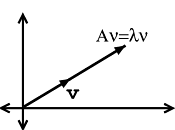
)


"An eigenvector is a vector that a linear operator sends to a multiple of itself"

In [6]:
#Calculate Eigenvalues and Eigenvectors of Covariance matrix
from numpy import linalg as LA
lambdas, vs = LA.eig(cov)
print('Eigenvalues\n',lambdas)
print('Eigenvectors:\n',vs)

Eigenvalues
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


# **Step4: Sort eigenvalues and their corresponding eigenvectors.**

In [7]:
def sorted_eig(lambdas,vs):  
    # sorts values & vectors together in order of decreasing eigenvalues
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  

sorted_lambdas, sorted_vs = sorted_eig(lambdas,vs)
print('Sorted Eigenvalues\n',sorted_lambdas)
print('Sorted Eigenvectors\n',sorted_vs)

Sorted Eigenvalues
 (2.938085050199994, 0.9201649041624853, 0.14774182104494696, 0.020853862176462845)
Sorted Eigenvectors
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


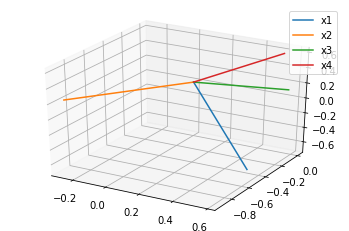

In [8]:
datasets = {"x1": [0.52106591, -0.37741762, -0.71956635], "x2":[-0.26934744 ,-0.92329566,  0.24438178], "x3":[0.5804131 , -0.02449161 , 0.14212637],"x4":[0.56485654, -0.06694199,  0.63427274]}
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


# Plot Eigenvectors 
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
for key,p in datasets.items():
    ax.plot([0,p[0]], [0,p[1]], [0,p[2]], label=key)

ax.legend()

plt.show()

The first(Blue) eigenvector points along the direction of biggest variance

The second(Oragne) eigenvector points along the direction of second-biggest variance

The third(Green) eigenvector points along the direction of third-biggest variance.

The Fourth(Red) eigenvector points along the direction of samllest variance


# **Step5: Pick k eigenvalues and form a matrix of eigenvectors.**

### **Finding Principal Components**

We will eliminate one or more of the less-significant directions of variance, and pick k significant eigenvectors.In other words, we will project the data onto the various principal components by projecting along the less-significant components. \
**Or even simpler: We will "squish" the data along the smallest-variance directions.**

In [9]:
#The @ (at) operator is intended to be used for matrix multiplication
# project the covariance matrix, using eigenvectors
proj_cov = sorted_vs.T @ cov @ sorted_vs   
print(proj_cov)

[[ 2.93808505e+00 -4.94056456e-17 -3.03069648e-16  1.82062396e-16]
 [-5.68409298e-17  9.20164904e-01  1.00310725e-16 -3.07442115e-17]
 [-4.25155805e-16  1.64803450e-16  1.47741821e-01  3.86376242e-17]
 [ 1.06490991e-16 -8.20632200e-17 -3.86546375e-17  2.08538622e-02]]


# **Step6: Transform the original matrix.**

### **Project data to new cordinate system**

In [10]:
new_data_all = X_data @ sorted_vs.T   # project all the data 
print("Checking: new_data_all.shape =",new_data_all.shape)
print("New covariance matrix = \n",np.cov(new_data_all.T) )

Checking: new_data_all.shape = (150, 4)
New covariance matrix = 
 [[ 0.42586711 -0.20804596 -0.02539725 -1.18960081]
 [-0.20804596  0.29496763 -0.02993065  0.54415763]
 [-0.02539725 -0.02993065  0.10075165  0.20017146]
 [-1.18960081  0.54415763  0.20017146  3.75137066]]


### **Truncated data projected onto principal axes of coordinate system**

In [11]:
W = sorted_vs[0:2,:]  # keep only the first and 2nd eigenvectors 
print('Eigenvectors:\n',W)
new_data_proj = X_data @ W.T   # project 
print("Checking: new_data_proj.shape =",new_data_proj.shape)
print("New covariance matrix in projected space = \n",np.cov(new_data_proj.T) )

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]]
Checking: new_data_proj.shape = (150, 2)
New covariance matrix in projected space = 
 [[ 0.42586711 -0.20804596]
 [-0.20804596  0.29496763]]


In [13]:
fig = go.Figure(data=[(go.Scatter3d(x=new_data_all[:,0], y=new_data_all[:,1], z=new_data_all[:,2],
        mode='markers', marker=dict(size=4,opacity=0.9), name="full data" ))])
fig.add_trace(go.Scatter3d(x=new_data_proj[:,0], y=new_data_proj[:,1], z=new_data_proj[:,0]*0,
        mode='markers', marker=dict(size=4,opacity=0.9), name="projected" ) )
fig.update_layout(scene_aspectmode='data')
fig.show()

**Blue** points shows, the dataset points and **Red** points shows projected datapoints of dataset